# Women's E-Commerce Clothing

This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

We will use NLP RNN to process review txt to get the result of Recommand IND.

## 1.Project Introduction 

In this project, we need use NLP technique to process E Commerce Review text to detect the Recommand Indicator, We will use deep learning RNN to do this project.


The dataset contains a total of 23486 labeled review text, with approximately 81% of them being classified as recommended.  The review text as a collection of strings, which are typically short and written in natural language.


RNNs have a vanishing gradient problem, which makes it difficult to train them on long sequences of data.
LSTM, or Long Short-Term Memory, is a type of RNN that solves the vanishing gradient problem by using gates to control the flow of information. The gates allow the network to selectively remember or forget information from previous time steps, which makes it better suited for processing long sequences of data.
GRU, or Gated Recurrent Unit, is another type of RNN that also uses gates to control the flow of information. However, GRUs have fewer parameters than LSTMs and are faster to train.
NLP, or Natural Language Processing, is a field of study that focuses on the interaction between computers and human languages. NLP techniques are used to analyze, understand, and generate human language.

In the context of NLP, RNNs, LSTMs, and GRUs are often used for tasks such as language modeling, machine translation, and sentiment analysis. Each type of network has its own strengths and weaknesses, and the choice of which to use depends on the specific task and dataset.


## 2.Library Import

We will use keras model to create RNN traing model.

In [1]:
import pathlib
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import os
import torch
from PIL import Image
from PIL import Image, ImageDraw


# model development
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.ops.array_ops import tensor_scatter_update
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Activation, Add, GlobalAveragePooling2D 
from tensorflow.keras import regularizers

## 2. Load Data 

In [2]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv


### Use the following code to reduce memory usage, since sometime it would be out of memory while using TPU/CPU.  


In [3]:


def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df



In [4]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [5]:
df=import_data('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.head())
print("Recommended IND result value as follows:")
df['Recommended IND'].unique() 

Memory usage of dataframe is 1.97 MB
Memory usage after optimization is: 1.62 MB
Decreased by 17.6%
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Departmen

array([1, 0], dtype=int8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               23486 non-null  int16   
 1   Clothing ID              23486 non-null  int16   
 2   Age                      23486 non-null  int8    
 3   Title                    19676 non-null  category
 4   Review Text              22641 non-null  category
 5   Rating                   23486 non-null  int8    
 6   Recommended IND          23486 non-null  int8    
 7   Positive Feedback Count  23486 non-null  int8    
 8   Division Name            23472 non-null  category
 9   Department Name          23472 non-null  category
 10  Class Name               23472 non-null  category
dtypes: category(5), int16(2), int8(4)
memory usage: 1.6 MB


In [7]:
print("records count:",df.shape[0])
print("duplicate records:",len(df[df.duplicated()]))
print("Missed value records:",df.isnull().sum().sum())
print('Number of Missing Values per column:')
df.isnull().sum().sort_values(ascending=False)

records count: 23486
duplicate records: 0
Missed value records: 4697
Number of Missing Values per column:


Title                      3810
Review Text                 845
Division Name                14
Department Name              14
Class Name                   14
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
dtype: int64

In [8]:
df = df.dropna(subset = ['Review Text', 'Division Name', 'Department Name', 'Class Name'])

## 3. EDA 

Accord to the above basic data analysis, we know that the recommend index are 1 or 0, and there are also some missed value columns on records, but based on our project, we only need use the Review Text to detect the product should be recommand or not. So our major work is using NLP model to clearify the noisy in the review text.

Let's check the rating of recommended records first

 Non Recommended  this percentage: 0.181
 Recommended  this percentage: 0.819


([<matplotlib.patches.Wedge at 0x76169d384b10>,
 [Text(0.9269044640242977, 0.5923243322469789, 'No recommend'),
  Text(-0.9269044640242977, -0.592324332246979, 'Recommend')],
 [Text(0.5055842531041623, 0.32308599940744304, '18.1%'),
  Text(-0.5055842531041623, -0.3230859994074431, '81.9%')])

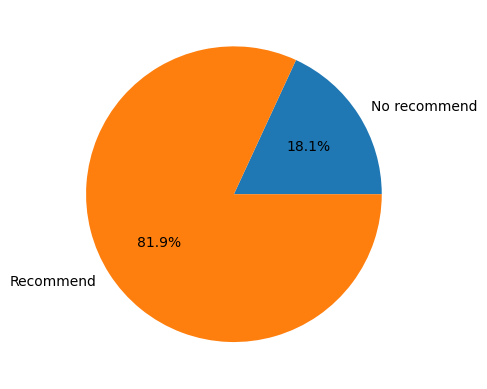

In [40]:
print(" Non Recommended  this percentage:", round(len(df[df['Recommended IND'] == 0])/ len(df),3))
print(" Recommended  this percentage:", round(len(df[df['Recommended IND'] == 1])/ len(df),3))
categories = df['Recommended IND'].unique()
non_recommend_percent=round(len(df[df['Recommended IND'] == 0])/ len(df),3) 
recommend_percent=round(len(df[df['Recommended IND'] == 1])/ len(df),3) 

labels = 'No recommend', 'Recommend'
sizes = [non_recommend_percent, recommend_percent]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

Then Check the recommended records based on each category

    Recommended IND      Class Name     Count
20                1         Blouses  0.806571
21                1  Casual bottoms  1.000000
22                1        Chemises  1.000000
23                1         Dresses  0.805207
24                1      Fine gauge  0.832861
25                1       Intimates  0.857143
26                1         Jackets  0.843338
27                1           Jeans  0.879529
28                1           Knits  0.812365
29                1        Layering  0.878788
30                1         Legwear  0.854430
31                1          Lounge  0.857997
32                1       Outerwear  0.811912
33                1           Pants  0.832593
34                1          Shorts  0.838816
35                1          Skirts  0.841639
36                1           Sleep  0.855140
37                1        Sweaters  0.797101
38                1            Swim  0.795181
39                1           Trend  0.745763


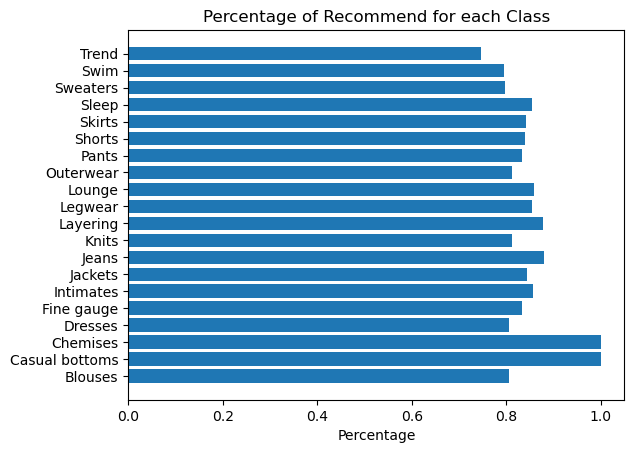

In [67]:
classes = (
    df
    .groupby(['Recommended IND', 'Class Name'])
    .size()
    .to_frame()
    .rename(columns={0:'Count'})
    .reset_index()
          )  
# get proportions in each class
a = classes.groupby('Class Name')['Count'].transform('sum')

classes['Count'] = classes['Count'].div(a)
Recommend_classes = classes[classes['Recommended IND'] == 1]
print(Recommend_classes)
 
plt.rcdefaults()
fig, ax = plt.subplots()

 
Class_Name = Recommend_classes['Class Name']
counts = Recommend_classes['Count']

y_pos = np.arange(len(Class_Name))
ax.barh(y_pos, counts )
ax.set_yticks(y_pos, labels=Class_Name)
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Recommend for each Class')

plt.show()
 
 

In [10]:
classes = (
    df
    .groupby(['Recommended IND', 'Class Name'])
    .size()
    .to_frame()
    .rename(columns={0:'Count'})
    .reset_index()
          )  
# get proportions in each class
a = classes.groupby('Class Name')['Count'].transform('sum')

classes['Count'] = classes['Count'].div(a)

# pivot table
classes = classes.pivot(index='Class Name', columns='Recommended IND') 
fig = go.Figure()
fig.add_trace(go.Bar(
    y=classes.index,
    x=classes.iloc[:,0],
    name='Not Recommended',
    orientation='h',
    marker=dict(
        color='#f6b220')
    ))

fig.add_trace(go.Bar(
    y=classes.index,
    x=classes.iloc[:,1],
    name='Recommended',
    orientation='h',
    marker=dict(
        color='#0E2F44')
    ))
fig.update_layout(barmode='stack')

fig.update_layout(
                title = 'Distribution of <b>Product Class</b> by Recommendation ',
                barmode='stack', 
                autosize=False,
                width=680,
                height=800,
                font=dict(family="Rockwell, sans-serif", size=18, color='#000000'),
                margin=dict(
                  l=150,
                  r=100,
                   b=30,
                   t=100,
                   pad=4
                          ))
fig.layout.xaxis.tickformat = ',.0%'

fig.show()

In [11]:
rating = (
    df['Rating']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Rating', 'Rating':'Count'})
    .sort_values(by=['Rating'], ascending=True)   
          ) 

rating['percent'] = ((rating['Count'] / rating['Count'].sum())*100).round(2).astype(str) + '%'

colors = ['#0E2F44',] * 5
colors[4] = '#f6b220'

fig = go.Figure(go.Bar(
            y=rating['Count'],
            x=rating['Rating'],
            marker_color=colors,
            text=rating['percent']
                        ))
fig.show()

After compare the Recommend Indicator with Rating, we can find that the Rating cannot match to the Recommend Indicator on percentage level, that means if we use rating, it would be hard to figure out the Recommend items.


For NLP processing, the most important part is EDA process, during the EDA process, we need remove all of the noise words, such as stop words, html, puncutations and etc. 
I created the following function to do remove all stop words, html, puncutations, shortforms and low case all words.


In [12]:
#remove punctuations
import re
import string
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
table = str.maketrans("", "", string.punctuation)
def remove_punc(text):
    return text.translate(table)

# Clean text by removing URLs, punctuation, and converting to lowercase
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = text.lower() # Convert to lowercase
    return text

#removing any shortforms if present
def remove_shortforms(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def remove_special_char(text):
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text

def remove_wordswithnum(text):
    text = re.sub("\S*\d\S*", "", text).strip()
    return text

def lowercase(text):
    text = text.lower()
    return text

def remove_stop_words(text):
    text = remove_stopwords(text)
    return text

st = SnowballStemmer(language='english')
def stemming(text):
    r= []
    for word in text :
        a = st.stem(word)
        r.append(a)
    return r

def listToString(s):  
    str1 = " "   
    return (str1.join(s))

def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

# lemmatizer = WordNetLemmatizer()
# def lemmatize_words(text):
#     text = lemmatizer.lemmatize(text)
#     return text

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def rem_stop(text):
    word_list = [word for word in text.split() if word not in stop]
    return " ".join(word_list)


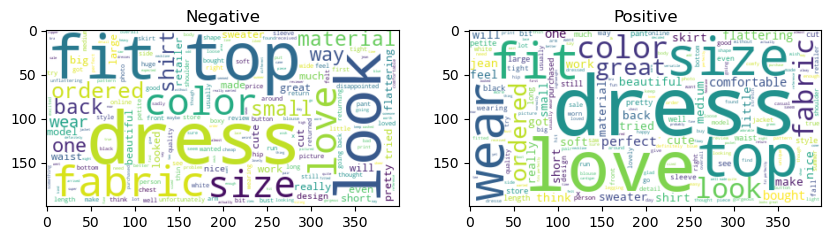

In [13]:
from wordcloud import WordCloud
# Let's just work with the reviews and recommendations
data = df[['Review Text', 'Recommended IND']]


# print(train_data)
negative_cases = "".join(data[data['Recommended IND'] == 0]['Review Text'].values)
positive_cases = "".join(data[data['Recommended IND'] == 1]['Review Text'].values)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

wc1 = WordCloud(background_color='white').generate(negative_cases)
wc2 = WordCloud(background_color='white').generate(positive_cases)

axs[0].imshow(wc1, interpolation='bilinear')
axs[0].set_title('Negative')
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].set_title('Positive')

plt.show()


## Preprocessing NLP text 

In [14]:
data['Review Text'] = data['Review Text'].apply(lambda x: remove_punc(x))
data['Review Text'] = data['Review Text'].apply(lambda x: clean_text(x))
data['Review Text'] = data['Review Text'].apply(lambda x: remove_shortforms(x))
data['Review Text'] = data['Review Text'].apply(lambda x: remove_wordswithnum(x))
data['Review Text'] = data['Review Text'].apply(lambda x: lowercase(x))
data['Review Text'] = data['Review Text'].apply(lambda x: remove_stop_words(x))
data['Review Text'] = data['Review Text'].apply(lambda x: remove_punctuations(x))
data['Review Text'] = data['Review Text'].apply(lambda x: remove_links(x))
 
data['Review Text'] = data['Review Text'].apply(lambda x: remove_html(x))
data['Review Text'] = data['Review Text'].apply(lambda x: rem_stop(x))

 
data.head(100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Review Text,Recommended IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened store im glad ...,1
2,high hopes dress wanted work initially ordered...,0
3,love love love jumpsuit fun flirty fabulous ti...,1
4,shirt flattering adjustable tie perfect length...,1
...,...,...
97,excited order red xs cute huge shapeless suppo...,0
99,need easy comfortable tops everyday wear bough...,0
100,wasnt sure neckline lower wavy thought wearing...,1
101,brand little bit allovertheplace sizes tried p...,1


Please compare the result with the pattern before EDA

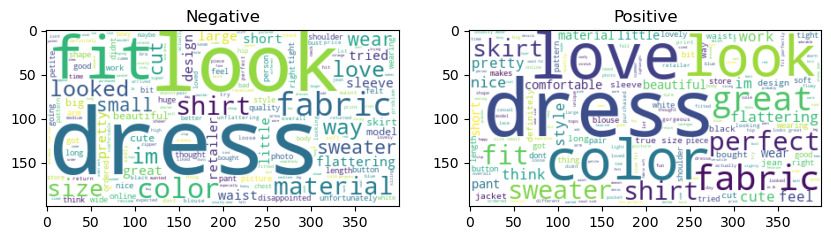

In [15]:
# print(train_data)
negative_cases = "".join(data[data['Recommended IND'] == 0]['Review Text'].values)
positive_cases = "".join(data[data['Recommended IND'] == 1]['Review Text'].values)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

wc1 = WordCloud(background_color='white').generate(negative_cases)
wc2 = WordCloud(background_color='white').generate(positive_cases)

axs[0].imshow(wc1, interpolation='bilinear')
axs[0].set_title('Negative')
axs[1].imshow(wc2, interpolation='bilinear')
axs[1].set_title('Positive')

plt.show()

## 4. Preparing the training & validation data

In [16]:
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND']
X=X.to_numpy().reshape(-1,)
# Spliting train & test
train_X, X_val, y_train, y_val = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    shuffle=True)

 

In [17]:
print(train_X.shape)
print(train_X[0])

(18102,)
love wish came colors fabric cut comfortable bought usual size little sad shrunk touch wash washed air dried dryer mins speed drying process im short ill probably wear cover loungewear house super cute great price sale sale


## 5.Build RNN Training Models

we will build two RNN Training Models: LSTM and GRU, and will using the validation data to check which model is more accuracy to use for this NLP process.
In this model, I apply the EarlyStopping if the accuracy won't increase anymore, it can save time and get a better performance.
Both model will use word embedding methods to create an embedding layer.

In [18]:
maxlen = 0
vocab = {"PAD": 0, "UNK": 1}
for i in range(len(train_X)) :
    if len(train_X[i]) > maxlen:
        maxlen = len(train_X[i])
    for word in train_X[i].split():
        if word not in vocab:               # word has not been assigned an index yet
            vocab[word] = len(vocab)        # Assign each word with a unique index
print(maxlen, len(vocab))

vocab_size = len(vocab)

348 15885



## 5.1 RNN LSTM Model 

LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) that is commonly used for Natural Language Processing (NLP) tasks such as language modeling, text classification, and sentiment analysis.
We already don the Data Preprocessing, here we will do the Model Training and Model Evaluation.


### RNN LSTM Model Trainning

This involves defining the architecture of the model, which typically includes one or more LSTM layers followed by one or more fully connected (dense) layers. The model is then trained using a training dataset, with the objective of minimizing a loss function such as cross-entropy.


In [19]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 1000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(train_X)
sequences = tokenizer.texts_to_sequences(train_X)
padded_seq_train =  pad_sequences(sequences,maxlen=max_len)
 
sequences_val = tokenizer.texts_to_sequences(X_val)
padded_seq_val =  pad_sequences(sequences_val,maxlen=max_len)
 
print(padded_seq_train.shape)
print(padded_seq_val.shape)


(18102, 150)
(4526, 150)


In [20]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = models.Sequential()



model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
# model.add(SimpleRNN(units=64))
# model.add(layers.LSTM(64, dropout=0.5))
model.add(layers.LSTM(100,return_sequences=True)) 
model.add(layers.LSTM(200))
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
 

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary() 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 100)          60400     
                                                                 
 lstm_1 (LSTM)               (None, 200)               240800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 256)               51456     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 402,913
Trainable params: 402,913
Non-trai

In [21]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
# history = model.fit(padded_seq_train,
#                     y_train,
#                     epochs=20,
#                     batch_size=72,
#                     validation_data=(padded_seq_val, y_val))
# adding early stopping monitor to determine the best validation accuracy for the mode
history = model.fit(padded_seq_train,y_train,
                    batch_size=72,
                    epochs=30,
                    validation_data=(padded_seq_val, y_val) ,
                    callbacks=[es]
)


Epoch 1/30
252/252 [==============================] - 29s 76ms/step - loss: 0.3582 - accuracy: 0.8511 - val_loss: 0.2863 - val_accuracy: 0.8752
Epoch 2/30
252/252 [==============================] - 9s 34ms/step - loss: 0.2682 - accuracy: 0.8871 - val_loss: 0.2856 - val_accuracy: 0.8829
Epoch 3/30
252/252 [==============================] - 6s 26ms/step - loss: 0.2556 - accuracy: 0.8948 - val_loss: 0.2724 - val_accuracy: 0.8802
Epoch 4/30
252/252 [==============================] - 7s 27ms/step - loss: 0.2447 - accuracy: 0.8981 - val_loss: 0.3457 - val_accuracy: 0.8498
Epoch 5/30
252/252 [==============================] - 7s 26ms/step - loss: 0.2344 - accuracy: 0.9039 - val_loss: 0.2825 - val_accuracy: 0.8831
Epoch 6/30
252/252 [==============================] - 6s 25ms/step - loss: 0.2278 - accuracy: 0.9088 - val_loss: 0.2969 - val_accuracy: 0.8816
Epoch 7/30
252/252 [==============================] - 6s 24ms/step - loss: 0.2198 - accuracy: 0.9108 - val_loss: 0.2898 - val_accuracy: 0.882

### RNN Model Evaluation

it is evaluated using a separate validation dataset to determine its accuracy. 

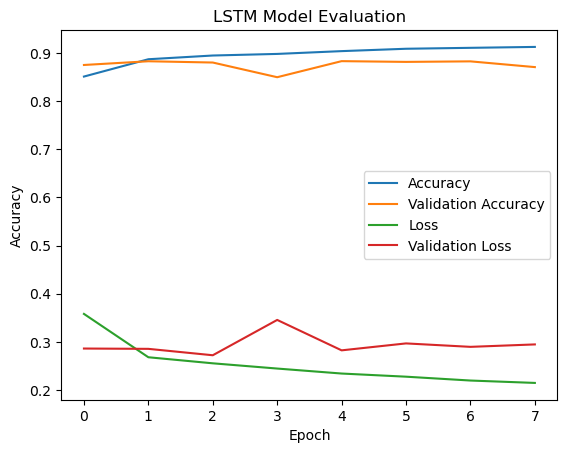

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("LSTM Model Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])

plt.show()

##  5.2 GRU Based RNN Model 
GRU (Gated Recurrent Unit) is another type of Recurrent Neural Network (RNN) that is commonly used for Natural Language Processing (NLP) tasks such as language modeling, text classification, and sentiment analysis.
we're using the Keras library to build a GRU RNN model for a text classification task. We're using Tokenizer and pad_sequences to preprocess the text data and convert it into a numerical format that can be used as input to the model. We're then defining the architecture of the model, which includes an Embedding layer to convert the numerical vectors into dense embeddings, a GRU layer to process the sequence of embeddings, and a Dense layer with a sigmoid activation function to output the predicted label.  


In [23]:

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
print(y_val_cat.shape)
print(y_val.shape)
print(y_val_cat )
print(y_val )

(4526, 2)
(4526,)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
21403    1
10463    1
3310     0
22161    1
17099    1
        ..
14699    1
13617    1
9208     1
16612    1
14424    1
Name: Recommended IND, Length: 4526, dtype: int8


In [24]:
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
EMBEDDING_DIM = 256
print(vocab_size,maxlen) 
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=150))
model_gru.add(SpatialDropout1D(0.2))
model_gru.add(Bidirectional(GRU(128)))
model_gru.add(Dense(128, activation='sigmoid'))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(2, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
# model_gru.compile(loss='binary_crossentropy', optimizer='adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
model_gru.summary()

15885 348
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 256)          4066560   
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 256)              296448    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)      

In [25]:
# X_train, X_val, y_train, y_val
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)
# history1 = model_gru.fit(padded_seq_train, y_train_cat, epochs=20, validation_data=(padded_seq_val, y_val_cat), batch_size=64, callbacks=[callback])
history1 = model_gru.fit(padded_seq_train, y_train_cat, epochs=20, validation_data=(padded_seq_val, y_val_cat), batch_size=64, callbacks=[es])
# history1 = model_gru.fit(padded_seq_train, y_train, epochs=20, validation_data=(padded_seq_val, y_val), batch_size=64, callbacks=[es])


Epoch 1/20
283/283 [==============================] - 28s 80ms/step - loss: 0.4241 - accuracy: 0.8173 - val_loss: 0.2850 - val_accuracy: 0.8776
Epoch 2/20
283/283 [==============================] - 8s 27ms/step - loss: 0.2770 - accuracy: 0.8796 - val_loss: 0.2811 - val_accuracy: 0.8825
Epoch 3/20
283/283 [==============================] - 7s 25ms/step - loss: 0.2654 - accuracy: 0.8860 - val_loss: 0.2789 - val_accuracy: 0.8833
Epoch 4/20
283/283 [==============================] - 7s 23ms/step - loss: 0.2512 - accuracy: 0.8924 - val_loss: 0.2702 - val_accuracy: 0.8858
Epoch 5/20
283/283 [==============================] - 6s 23ms/step - loss: 0.2469 - accuracy: 0.8954 - val_loss: 0.2671 - val_accuracy: 0.8871
Epoch 6/20
283/283 [==============================] - 7s 23ms/step - loss: 0.2409 - accuracy: 0.8989 - val_loss: 0.2660 - val_accuracy: 0.8847
Epoch 7/20
283/283 [==============================] - 7s 23ms/step - loss: 0.2332 - accuracy: 0.9008 - val_loss: 0.2670 - val_accuracy: 0.885

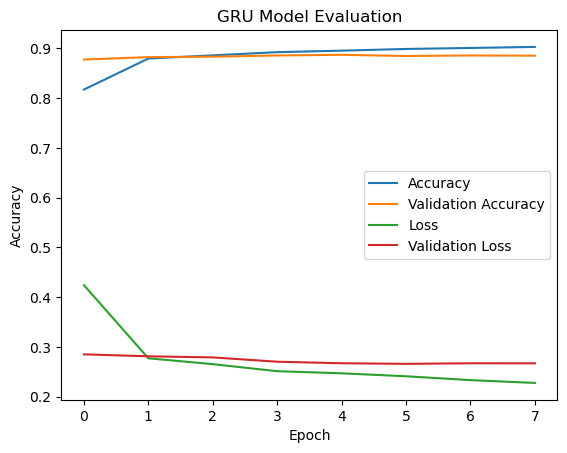

In [26]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title("GRU Model Evaluation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])

plt.show()


# 6. Conclusion


In the context of NLP, RNNs, LSTMs, and GRUs are often used for tasks such as language modeling, machine translation, and sentiment analysis. Each type of network has its own strengths and weaknesses, and the choice of which to use depends on the specific task and dataset.
In general, LSTMs are preferred for tasks that require processing long sequences of data, while GRUs are preferred for faster training and smaller datasets. However, recent research has shown that there is no clear winner between LSTMs and GRUs, and the choice between the two often comes down to the specific task and dataset.
But in this project, there is no huge difference between LSTM and GRU, but if consider all of parameters including accuacy and lost funtion, GRU is little bit better than LSTM.
